In [1]:
import os
os.chdir('./demo/')
import torch
import shutil
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from helpers import read_file

Train

In [2]:
def drawResult(path):
    x = [v[0] for v in path]
    y = [v[1] for v in path]
    for point in path:
        plt.scatter(x, y, color='b')
    X = []
    Y = []
    for i in range(len(path) - 1):
        X.append([x[i], x[i+1]])
        Y.append([y[i], y[i+1]])
    for i in range(len(X)):
        plt.plot(X[i], Y[i], color='r')
    
def change2path(change):
    path = [[0,0]]
    for i in range(len(change)):
        path.append([path[-1][0] + change[i][0], path[-1][1] + change[i][1]])
    return path

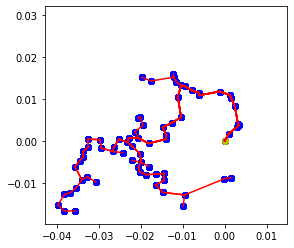

<Figure size 432x288 with 0 Axes>

In [3]:
demoDataDir = '../data/demoData/demotest1.txt'
allSeq, allSeqLen= read_file(demoDataDir)
for i in range(10):
    drawResult(change2path(allSeq[i]))
plt.scatter([0,0], [0,0], color='y')
plt.gca().set_aspect("equal")
plt.show()
plt.clf()

/home/e/e0509826/DivideTree/demo


/home/e/e0509826/DivideTree/demo/model.py:28: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  output, hidden = self.rnn(encoded.view(1, batch_size, -1), hidden)


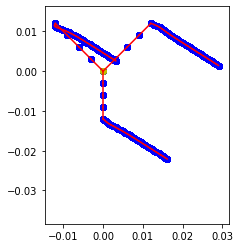

<Figure size 432x288 with 0 Axes>

In [6]:

from generate import generateTree

print(os.getcwd())
pt = "../demo/andes_peru.pt"
decoder = torch.load(pt)
resultTree = generateTree(decoder, predict_len=30, cuda=True)
for p in resultTree:
    drawResult(p)
plt.scatter([0,0], [0,0], color='y')
plt.gca().set_aspect("equal")
plt.show()
plt.savefig("1.png")
plt.clf()
